# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Шаг 1. Изучим общую информацию. 

ПЛАН ПРОЕКТА:
1. Импорт библиотек и открытие файла
2. Предобработка данных.
Определить пропущенные значения и заполнить пропуски.
3. Перод данных в нужный тип.
Привод данных к нужному типу для дальнейшего анализа.
4. Подсчет нужных значений и создание дополнительных столбцов для этих значений.
Подсчет значений дополнительных переменных, которые мы вводим в наше исследование опираясь на уже существующие данные.
5. Исследовательский анализ данных.
Более детальное изучение структуры данных при помощи их визуализации и обращению к описательным статистикам.
6. Определение факторов стоимости квартир.
Аналическое использование данных для определения зависимости между стоимостью квартиры и различными факторами.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import pylab as pl
import warnings
warnings.simplefilter(action='ignore')
pd.options.display.float_format = '{:,.1f}'.format


In [2]:
data = pd.read_csv('real_estate_data.csv', sep = '\t')
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.0",108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,NaN,...,25.0,nan,Санкт-Петербург,"18,863.0","16,028.0",1.0,482.0,2.0,755.0,nan
1,7,"3,350,000.0",40.4,2018-12-04T00:00:00,1,nan,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,"12,817.0","18,603.0",0.0,nan,0.0,nan,81.0
2,10,"5,196,000.0",56.0,2015-08-20T00:00:00,2,nan,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,"21,741.0","13,933.0",1.0,90.0,2.0,574.0,558.0
3,0,"64,900,000.0",159.0,2015-07-24T00:00:00,3,nan,14.0,nan,9,NaN,...,nan,0.0,Санкт-Петербург,"28,098.0","6,800.0",2.0,84.0,3.0,234.0,424.0
4,2,"10,000,000.0",100.0,2018-06-19T00:00:00,2,3.0,14.0,32.0,13,NaN,...,41.0,nan,Санкт-Петербург,"31,856.0","8,098.0",2.0,112.0,1.0,48.0,121.0


In [3]:
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

None

### Шаг 2. Предобработка данных

In [4]:
print('Количество пропущенных значений в общем количестве этажей:',data['floors_total'].isnull().sum())
print()
print('Количество пропущенных значений в названии местности расположения квартиры',data['locality_name'].isnull().sum())

data.dropna(subset = ['floors_total','locality_name'], inplace = True)

Количество пропущенных значений в общем количестве этажей: 86

Количество пропущенных значений в названии местности расположения квартиры 49


Убрал строки, где отсутствовали назания города, где продаются квартиры и количество этажей. Их количество было совсем невелико (соответственно 86 и 49 наблюдений) и никак не повлияло на общую картину, в то время как данные стали выглядеть более опрятно. 

In [6]:
print("Количество пропусков в типе квартир 'апартаменты':", data['is_apartment'].isnull().sum())

Количество пропусков в типе квартир 'апартаменты': 0


In [7]:
data['is_apartment'] = data['is_apartment'].fillna(False)  

Все отсутствующие значения в столбце обозначающем тип квартиры как "апартаменты" заменяем на False, что обозначает наблюдения с отсутствующим значением как не принадлежащие к категории апартаментов. 

In [8]:
print("Количество пропусков в количестве балконов:", data['balcony'].isnull().sum())

data['balcony'] = data['balcony'].fillna(0)

Количество пропусков в количестве балконов: 11475


Заменил пустые значения в балконах на ноль. В квартирах, где балконы по видимости отсутствовали, мы будем иметь вместо отсутствующих значений - 0, что будет указывать на отсутствие балкона. 


In [9]:
ceiling_median = data['ceiling_height'].median()
data['ceiling_height'] = data['ceiling_height'].fillna(ceiling_median)

Заменил отсутствующие значения в высоте потолков на медианные. т.к при их удалении мы могли бы потерять достаточно большое количество данных, а среднее больше медианы, что говорит о том, что значения столбца немного сдвинуты в сторону высоких значений (хвост со стороны больших значений).

Text(0, 0.5, 'Количество квартир')

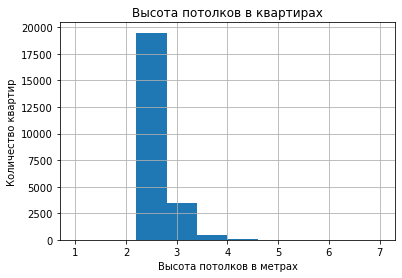

In [10]:
data['ceiling_height'].hist(bins = 10, range = (1,7))
pl.title("Высота потолков в квартирах")
pl.xlabel("Высота потолков в метрах")
pl.ylabel("Количество квартир")

In [11]:
print(data['ceiling_height'].describe())

data = data.query('ceiling_height < 5 and ceiling_height > 1.9')

count   23,565.0
mean         2.7
std          1.0
min          1.0
25%          2.6
50%          2.6
75%          2.7
max        100.0
Name: ceiling_height, dtype: float64


На гистограмме видно, что абсолютное большинство значений находятся до 5 метров и более 1.9 метра. Поэтому, чтобы избавиться от перекосов в данных, избавляемся от выбросов. Особенно тех, что составляют 25, 30 или даже 100 метров. Метод describe показывает, что теперь наши значения больше тяготеют к среднему и разброс не такой большой.

In [12]:
kitchen_median = data['kitchen_area'].median()
data['kitchen_area'] = data['kitchen_area'].fillna(kitchen_median)

Для заполнения пустых значений площади кухни, я использовал медиану, которая была на 1.5 метра меньше среднего и точнее отражала то, как распределены данные.

Text(0, 0.5, 'Количество квартир')

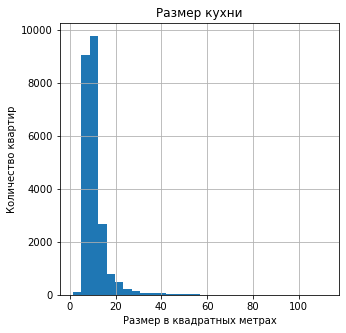

In [13]:
data['kitchen_area'].hist(bins = 30, figsize = (5,5))
pl.title("Размер кухни")
pl.xlabel("Размер в квадратных метрах")
pl.ylabel("Количество квартир")

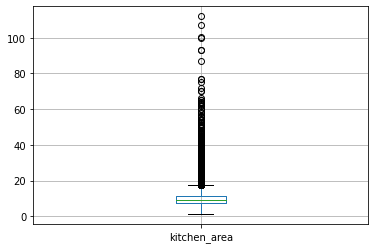

In [14]:
data.boxplot(column = 'kitchen_area')
plt.show()

In [15]:
data['kitchen_area'].describe()

count   23,525.0
mean        10.4
std          5.6
min          1.3
25%          7.3
50%          9.1
75%         11.4
max        112.0
Name: kitchen_area, dtype: float64

In [16]:
data = data.query('kitchen_area > 3.5 and kitchen_area < 30')

В силу того, что в размере кухни есть крайне маленькие и крайне высокие значения (1.3 метра или 50 метров), нам нужно от них избавиться, чтобы они не искажали меры центральной тенденции и создавали перекосы в данных.Можно заметить, что значения более 30 далеко уходят за высокий ус боксплота, который отображает верхнюю границу интерквартильного размаха, встречаются нечасто. 


Text(0, 0.5, 'Количество объявлений')

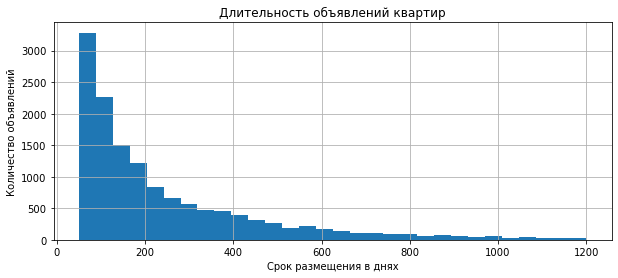

In [17]:
data['days_exposition'].hist(bins = 30, range = (50, 1200), figsize = (10,4))
pl.title("Длительность объявлений квартир")
pl.xlabel("Срок размещения в днях")
pl.ylabel("Количество объявлений")

In [18]:
data['days_exposition'].describe()

count   20,056.0
mean       179.3
std        218.1
min          1.0
25%         45.0
50%         94.0
75%        229.0
max      1,580.0
Name: days_exposition, dtype: float64

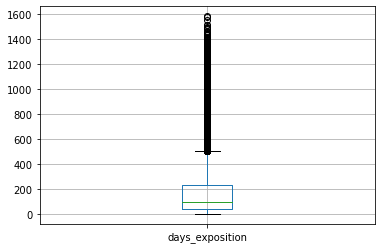

In [19]:
data.boxplot(column = 'days_exposition')
plt.show()

In [20]:
print(data.query('days_exposition > 800').count())
data = data.query('days_exposition < 800')

total_images            562
last_price              562
total_area              562
first_day_exposition    562
rooms                   562
ceiling_height          562
floors_total            562
living_area             527
floor                   562
is_apartment            562
studio                  562
open_plan               562
kitchen_area            562
balcony                 562
locality_name           562
airports_nearest        453
cityCenters_nearest     454
parks_around3000        454
parks_nearest           225
ponds_around3000        454
ponds_nearest           272
days_exposition         562
dtype: int64


1. Гистограмма демонстрирует нам, что достаточно большое количество наблюдений растянуто до района 800-1000 дней.
Метод describe показывает на интерквартильный размах и на аномально высокие значения(1580 дней). В тоже же время на бокплоте мы можем заметить, что большле количество значений выходит за верний ус, что говорит о приличном сдвиге данных в сторону больших значений.  
2. 386 кейсов больше 800, что не критично. Поэтому 800 может стать тем порогом, значения выше которого нам не нужны при первичной предобработке данных.
3. Соответственно мы отбрасываем значения, которые больше 800. 

In [21]:
print("Описательные статистики жилой площади квартир")

data['living_area'].describe()

Описательные статистики жилой площади квартир


count   17,873.0
mean        32.6
std         18.9
min          2.0
25%         18.1
50%         29.7
75%         40.9
max        347.5
Name: living_area, dtype: float64

In [22]:
data['living_area'].isna().count()

19491

In [23]:
living_median = data['living_area'].median()
data['living_area'] = data['living_area'].fillna(living_median)

In [24]:
data['living_area'].describe()

count   19,491.0
mean        32.4
std         18.1
min          2.0
25%         18.7
50%         29.7
75%         39.5
max        347.5
Name: living_area, dtype: float64

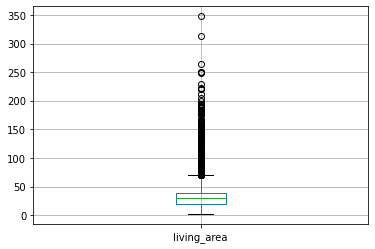

In [25]:
data.boxplot(column = 'living_area')
plt.show()

Text(0, 0.5, 'Количество квартир')

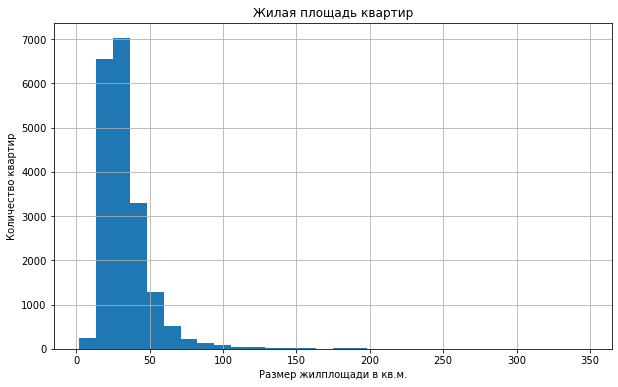

In [26]:
data['living_area'].hist(bins = 30, figsize = (10,6))
pl.title("Жилая площадь квартир")
pl.xlabel("Размер жилплощади в кв.м.")
pl.ylabel("Количество квартир")

In [27]:
data = data.query('living_area > 9 and living_area < 110')

Как мы можем заметить, значений в жилой площади более 110 кв.м и менее 9 кв.м совсем немного, поэтому имеет смысл убрать эти выбросы. Более того, мы можем заметить, что у нас имеется много значений, которые выходят за верхний ус, что говорит о перекосе данных в стороны больших значений.   

### 3. Перевод данных в нужный тип

In [28]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition']) 
data['floors_total'] = pd.to_numeric(data['floors_total'])
data['is_apartment'] = data['is_apartment'].astype('bool') 
data['balcony'] = data['balcony'].astype('int64')
data['days_exposition'] = pd.to_numeric(data['days_exposition'], errors = 'coerce')  
data['ceiling_height'] = pd.to_numeric(data['ceiling_height'], errors = 'coerce')


После осмотра разных типов данных в колонках, я привел значения в некоторых колонках к нужным для работы типам.

В столбце first_day_exposition я поменял тип данных на дата, т.к это дата публикации а не вещественный тип. 

В столбце количества этажей и количества балконов данные были приведены к целочисленному типу данных, так же, как и количество дней, которое объявление висело в Сети. 

Столбец is_apartment был приведен к булевому типу по аналогии со столбцами студия и открытая планировка. Значения этого столбца аналогично должны принимать значения true/false в зависимости от того является ли недвижимость апартаментами или нет.

Значение колонки ceiling_height поменяла вещественный тип на float64 посредством метода to_numeric, т.к потолки измеряются не в категориях, а в единицах измерения.

#### Посчитаем определенные значения и добавим их в таблицу


In [29]:
pd.options.display.float_format = '{:.2f}'.format

#добавляем столбец с ценой на кваратный метр
data['square_metre'] = data['last_price'] / data['total_area']       

In [30]:
print ('\033[1m' + 'Соотношение общей цены, общей площади квартиры и цены за квадратный метр' + '\033[0m')

display(data[['last_price', 'total_area', 'square_metre']].head())

Соотношение общей цены, общей площади квартиры и цены за квадратный метр


,last_price,total_area,square_metre
1,3350000.00,40.40,82920.79
2,5196000.00,56.00,92785.71
3,64900000.00,159.00,408176.10
5,2890000.00,30.40,95065.79
6,3700000.00,37.30,99195.71


In [31]:
def floor_type(row):
    if row['floor'] == row['floors_total']:
        return "последний"
    elif row['floor'] == 1:
        return "первый"
    else:
        return "другой"
data['floor_category'] = data.apply(floor_type, axis = 1) 

In [32]:
print ('\033[1m' + 'Количество этажей в доме, этаж квартиры и категория этого этажа' + '\033[0m')
display(data[['floor', 'floors_total', 'floor_category']].head())

Количество этажей в доме, этаж квартиры и категория этого этажа


,floor,floors_total,floor_category
1,1,11.00,первый
2,4,5.00,другой
3,9,14.00,другой
5,5,12.00,другой
6,6,26.00,другой


1. Для определения категории этажа квартиры я написал функцию. В качестве аргумента используется ряд. 
Функция проходится по каждому рядку в котором есть значение этажа. Если это последний этаж, который 
соответственно будет совпадать с количеством этажей в здании, то я функция возвращает категорию "последний".
Если значение равно единице, то возвращает "первый". Во всех остальных случаях - "другой". 
2. Потом смастерим новый столбец, в который сложим все значения, полученные из каждой строки датафрейма.
3. Для наглядности продемонстрируем новый столбец вместе со столбцами, данные из которых использовались
для его создания.

In [33]:
data['weekday_ad_exposition'] = data['first_day_exposition'].dt.weekday
print ('\033[1m' + 'День недели подачи объявления' + '\033[0m')
display(data[['weekday_ad_exposition', 'first_day_exposition']].head())

День недели подачи объявления


,weekday_ad_exposition,first_day_exposition
1,1,2018-12-04
2,3,2015-08-20
3,4,2015-07-24
5,0,2018-09-10
6,3,2017-11-02


In [34]:

data['month_ad_exposition'] = data['first_day_exposition'].dt.month
print ('\033[1m' + 'Месяц подачи объявления' + '\033[0m')
display(data[['month_ad_exposition', 'first_day_exposition']].head())

Месяц подачи объявления


,month_ad_exposition,first_day_exposition
1,12,2018-12-04
2,8,2015-08-20
3,7,2015-07-24
5,9,2018-09-10
6,11,2017-11-02


In [35]:
data['year_ad_exposition'] = data['first_day_exposition'].dt.year
print ('\033[1m' + 'Год подачи объявления' + '\033[0m')
display(data[['year_ad_exposition', 'first_day_exposition']].head())

Год подачи объявления


,year_ad_exposition,first_day_exposition
1,2018,2018-12-04
2,2015,2015-08-20
3,2015,2015-07-24
5,2018,2018-09-10
6,2017,2017-11-02



Для создания  столбцов, отдельно содержащих информацию по дню недели, месяцу и году, мы 
применяем аттрибут dt вместе с соответственно weekday, month, year к значениям столбца даты публикации 
объявлений. Потом складируем эти данные в отдельные столбцы.

In [36]:

def living_to_common_area(row):
    return row['living_area'] / row['total_area']
data['living_to_total_size'] = data.apply(living_to_common_area, axis =1)

In [37]:
print ('\033[1m' + 'Пропорция жилой площади к общей площади квартиры' + '\033[0m')

display(data[['living_area', 'total_area', 'living_to_total_size']].head())

Пропорция жилой площади к общей площади квартиры


,living_area,total_area,living_to_total_size
1,18.60,40.40,0.46
2,34.30,56.00,0.61
3,29.70,159.00,0.19
5,14.40,30.40,0.47
6,10.60,37.30,0.28


1. Написал функцию, которая получает как аргумент значение row, а возвращает из каждой строки соотношение 
жилой площади к общей площади.
2. Потом создал отдельный столбец, в котором складировал значения соотношения значения жилой площади к общей('living_to_total_size'), которые появились в результате применения ранее созданной функции ко всему датафрейму.
3. Демострация наглядного результата со всеми тремя колонками.


In [38]:
def kitchen_to_common_area(row):
    return row['kitchen_area'] / row['total_area']
data['kitchen_to_total_size'] = data.apply(kitchen_to_common_area, axis = 1)

In [39]:
print ('\033[1m' + 'Соотношение площади кухни к жилой площади' + '\033[0m')

display(data[['kitchen_area', 'total_area', 'kitchen_to_total_size']].head())

Соотношение площади кухни к жилой площади


,kitchen_area,total_area,kitchen_to_total_size
1,11.00,40.40,0.27
2,8.30,56.00,0.15
3,9.10,159.00,0.06
5,9.10,30.40,0.30
6,14.40,37.30,0.39


Аналогично предыдущему заданию:
1. Написал функцию, которая получает как аргумент значение row, а возвращает из каждой строки соотношение 
кухни к общей площади.
2. Потом создал отдельный столбец('kitchen_to_total_size'), в котором складировал значения соотношения значения площади кухни к общей, которые появились в результате применения ранее созданной функции ко всему датафрейму.
3. Распечатал все три колонки для наглядности.

### Шаг 4. Проведем исследовательский анализ данных

In [40]:
data['total_area'].describe()

count   19334.00
mean       55.82
std        24.66
min        12.00
25%        39.00
50%        50.00
75%        65.80
max       500.00
Name: total_area, dtype: float64

Text(0, 0.5, 'Количество квартир')

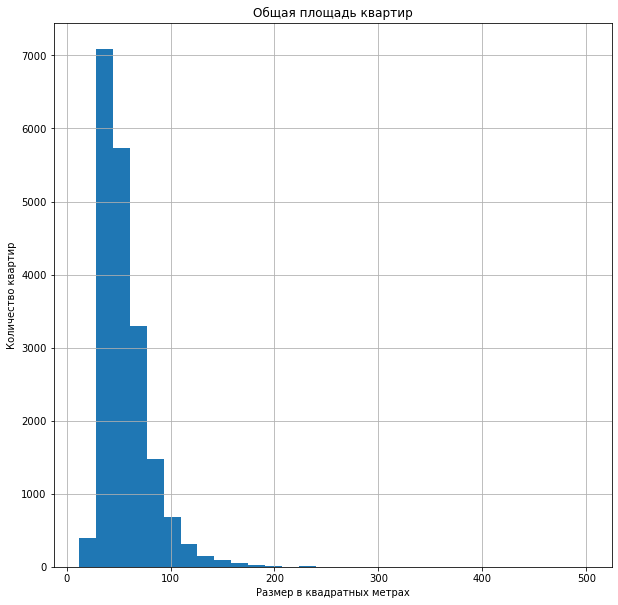

In [41]:
data['total_area'].hist(bins = 30, figsize = (10,10))
pl.title("Общая площадь квартир")
pl.xlabel("Размер в квадратных метрах")
pl.ylabel("Количество квартир")

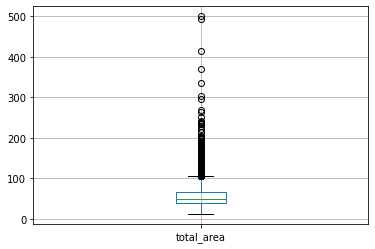

In [42]:
data.boxplot(column = 'total_area')
plt.show()

In [43]:
data = data.query('total_area > 29 and total_area < 104')


На боксплоте видно, что верхний ус у нас заканчивается в районе чуть больше 105 м, как и на гистограмме, 
чтобы изавиться от чрезмерно больших значений, мы убираем все значения больше 104 метров.



In [44]:
print(data['last_price'].median())
data['last_price'].describe()

4400000.0


count      17992.00
mean     5020692.26
std      2769525.74
min       430000.00
25%      3400000.00
50%      4400000.00
75%      5999000.00
max     53000000.00
Name: last_price, dtype: float64

In [45]:
data['last_price'] = data['last_price'] / 1000000

По интерквартильному размаху можем заметить что, большинство значений до верхнего уса находится в пределах 10 миллионов рублей. Соответственно все большие значения могут искажать показатели данной переменной и не позволят нам нормально провести корреляционный анализ, на чём я уже убедился. Поэтому убираем все выбросы 10 миллионов, которые хотя и составляют определенную часть значений, больше вредят нам, чем позволяют использовать данные этого столбца для определения связей между переменными.

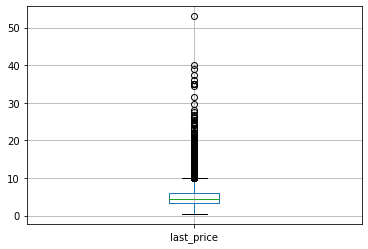

In [46]:
data.boxplot(column = 'last_price')
plt.show()

Text(0, 0.5, 'Количество квартир')

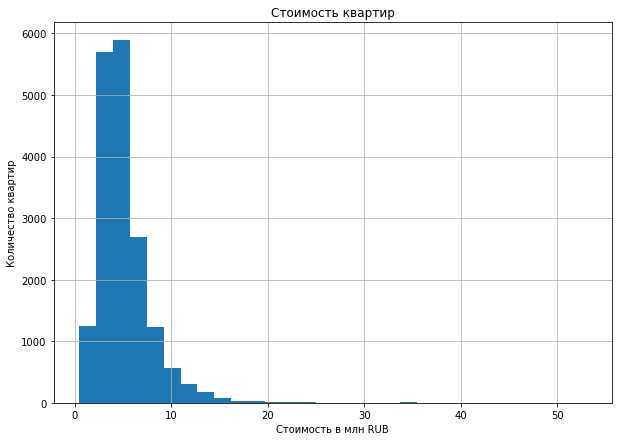

In [47]:
data['last_price'].hist(bins = 30, figsize = (10,7))
pl.title("Стоимость квартир")
pl.xlabel("Стоимость в млн RUB")
pl.ylabel("Количество квартир")

In [48]:
data = data.query('last_price > 1 and last_price < 10')

1. При просмотре статистических показателей обращает на себя наличие очень большого максимума,
в то время как интерквартильный размах находится между 3.3 и 6.4 млн.
2. Чтобы избавиться от миллионных значений, я разделил все значения на миллион.  
3. Разброс значений довольно ощутимый, что можно заметь из диаграммы, боксплота и метода describe. 
4. При более детальном просмотре малых значений, можем заметить, что малая цена установлена в поселках
и маленьких городах. Значений до 1 000 000 всего 161 штука. Чтобы избавиться от этих выбросов - удалим их.
5. На боксплоте видно, что у нас достаточно много больших значений, которые создают перекос в данных.Мы избавляемся от них
и ставим верхний порог цене в 10млн.

In [49]:
data['rooms'].describe()

count   16937.00
mean        1.88
std         0.85
min         0.00
25%         1.00
50%         2.00
75%         2.00
max         6.00
Name: rooms, dtype: float64

In [50]:
print(data.groupby('rooms')['studio'].sum())

rooms
0   21.00
1    4.00
2    0.00
3    0.00
4    0.00
5    0.00
6    0.00
Name: studio, dtype: float64


1.В столбце с количеством комнат есть значения ноль. Они могут показаться странными, но при 
проверке на принадлежность к студиям мы убеждаемся, что почти все безкомнатные квартиры являются
студиями. Поэтому удалять их не стоит.
2. На боксплоте мы видим, что квартиры с 6 и более комнатами практически отсутствуют. Поэтому избавимся
от этих выбросов, чтобы они не искажали нам данные.

In [51]:
print ('\033[1m' + 'Количество комнат в квартирах' + '\033[0m')
data['ceiling_height'].describe()

Количество комнат в квартирах


count   16937.00
mean        2.66
std         0.16
min         2.00
25%         2.60
50%         2.65
75%         2.65
max         4.70
Name: ceiling_height, dtype: float64

Text(0, 0.5, 'Количество квартир')

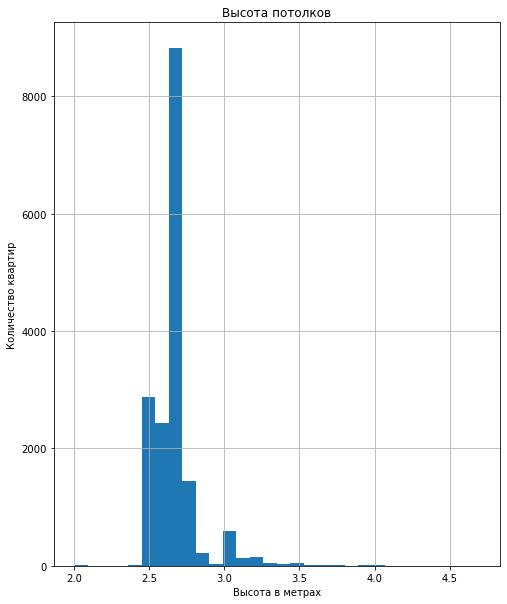

In [52]:
data['ceiling_height'].hist(bins = 30, figsize = (8,10))

pl.title("Высота потолков")
pl.xlabel("Высота в метрах")
pl.ylabel("Количество квартир")

In [53]:
data = data.query('ceiling_height < 3')

На боксплоте видно, что большое количество значений находится за пределами верхнего уса и доходит до 4 метров. Все что выше является выбросом и будет удалено из наших данных. 

In [54]:
print ('\033[1m' + 'Описательные статистики длительности объявлений квартир' + '\033[0m')
data['days_exposition'].describe()

Описательные статистики длительности объявлений квартир


count   15857.00
mean      147.79
std       159.65
min         1.00
25%        42.00
50%        85.00
75%       198.00
max       798.00
Name: days_exposition, dtype: float64

In [55]:
print(data['days_exposition'].quantile([.005, .5, .95]))

0.01     3.00
0.50    85.00
0.95   504.00
Name: days_exposition, dtype: float64


Text(0, 0.5, 'Количество объявлений')

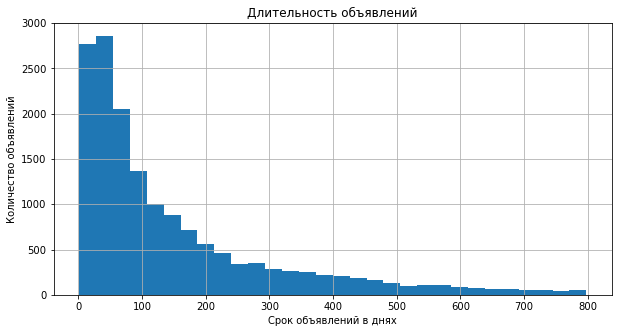

In [56]:
data['days_exposition'].hist(bins = 30, figsize = (10,5))
pl.title("Длительность объявлений")
pl.xlabel("Срок объявлений в днях")
pl.ylabel("Количество объявлений")

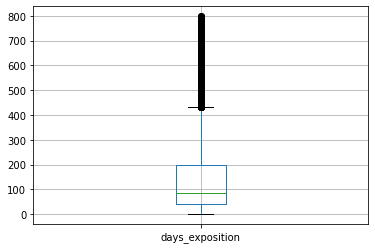

In [57]:
data.boxplot(column = 'days_exposition')
plt.show()

In [58]:
data = data.query('days_exposition > 3 and days_exposition < 524')

1. Чуть раньше я уже успел убрать выбросы в длительности продажи квартиры.
2. Как мы можем заметить в среднем продажа длиться 154 дня. Хотя присутствует довольно 
ощутимый разброс - стандартное отклонение равно 164. 
3. Присутствует и достаточно большое количество выбросов в больших значениях. Например, на боксплоте мы можем заметить,
что достаточное количество наблюдений находится за пределами максимального значения в районе от 500 до 800 значений.
4. Это подтверждается и статистическими данными метода desribe - максимальное значение 799 (уже откорректированное)
на 3 стандартных отклонения удалилось от 3го квартиля. 
5. Чтобы избавиться от чрезмерно больших значений я использую персентили и беру 95% всех значений. Соответственно я отрезаю 5% самых больших значений, которые создают перекосы в данных, хотя они представляют незначительное количество наблюдений. Поэтому порог в 523 будет говорить о том, что объявления с этим сроком и больше являются слишком долгими. По этой причине мы удалим их. 
6. Самые маленькие значения, которые нам искажают картину видны на гистограмме. Все наблюдения,
которые бали короче 4 дней будут удалены. 


In [59]:
print("Коэффициент корреляции между стоимостью квадратного метра и общей площадью квартиры:",data['square_metre'].corr(data['total_area']))

Коэффициент корреляции между стоимостью квадратного метра и общей площадью квартиры: -0.15714493485936332


In [60]:
print("Коэффициент корреляции между стоимостью квадратного метра и количеством комнат:",data['square_metre'].corr(data['rooms']))

Коэффициент корреляции между стоимостью квадратного метра и количеством комнат: -0.28747855880376183


In [61]:
print("Коэффициент корреляции между стоимостью квадратного метра и близостью к центру:", data['square_metre'].corr(data['cityCenters_nearest']))

Коэффициент корреляции между стоимостью квадратного метра и близостью к центру: -0.39505580991789413


In [62]:
print("Коэффициент корреляции между стоимостью квадратного метра и днем размещения объявления:",data['square_metre'].corr(data['weekday_ad_exposition']))    

Коэффициент корреляции между стоимостью квадратного метра и днем размещения объявления: 0.0014835328307458504


In [63]:
print("Коэффициент корреляции между стоимостью квадратного метра и месяцем размещения объявления:", data['square_metre'].corr(data['month_ad_exposition']))    

Коэффициент корреляции между стоимостью квадратного метра и месяцем размещения объявления: 0.0047378225288540665


In [64]:
print("Коэффициент корреляции между стоимостью квадратного метра и годом размещения объявления:",data['square_metre'].corr(data['year_ad_exposition']))   

Коэффициент корреляции между стоимостью квадратного метра и годом размещения объявления: 0.08694682611319839


In [65]:
display(data.pivot_table(index = 'floor_category', values = 'square_metre'))

,square_metre
floor_category,
другой,93676.56
первый,77425.99
последний,81862.86


 1. Корреляция между общей площадью и ценой квадратного метра является негативной (-0.15). Это говорит о том, что при  увеличении площади квартиры, стоимость квадратного метра уменьшается и наоборот. При большом метраже стоимость квадратного метра уменьшается, т.к в общем продавец все равно получит большую сумму, а далеко не все покупатели готовы платить за квадратный метр такую же сумму при больших размерах квартиры. Аналогично, при маленьком метраже стоимость квадратного метра увеличивается. 
 
2. Цена на квадратный метр  имеет отрицательную корреляцию с количеством комнат(-0.28). Т.е. при увеличении количества комнат в квартире, цена квадратного метра будет более склонна к удешевлению. И наоборот, при увеличии цены квадратного метра, количествокомнат будет двигаться в сторону уменьшения.Данные этой корреляции подтверждают распростанёенный факт, что при увеличении количества комнат, квадратный метр квартиры в целом стоит дешевле. Эти данные вписываются в логику сегмента жилой неждвижимости, когда кв. м в квартирах с малым количеством комнат как правило дороже кв. м с большим количеством комнат.  

3. При увеличении расстояния от центра города, цена соответственно уменьшается. Поэтому между этими двумя переменными наблюдается четкая негативная корреляция (-0.39). Близость к центру является важным фактором ценообразования жилой недвижимости, т.к квартиры в центральной части города продолжают оставаться популярными среди покупателей по разным причинам:развитая инфраструктура, близость к работе и разврелечниями, хорошее транспортное сообщение.

4. Корреляция с днём недели и месяцем практически отсутствует(0.0002). Когда проверяем корреляцию с годом, то она чуть 
более выражена и позитивна(0.08). Экономика потихоньку восстанавливалась в 2017-2019 годах, в то время как в 2015-2016 стремительно пикировала вниз. Соответственно падала и покупальная способность населения. Когда экономика начала восстанавливаться, то и покупательная способность населения начала расти, поэтому и цену немного подтянулись вверх. 

5. При соотношении цены на квадратный метра и категорией этажа мы можем заметить, что первый этаж самый дешевый (на 9% дешевле последнего и на 19% "другого"). Последний на 12% процентов дешевле "другого". 



### Список с большим количеством объявлений, цена с ценой кв.м в населенных пунктах, их рейтинг по стоимости 

In [66]:
print ('\033[1m' + 'Количество объявлений по населенным пунктам' + '\033[0m')
display(data.pivot_table(index = 'locality_name', values = 'square_metre', aggfunc = 'count')\
    .sort_values(by = 'square_metre', ascending = False).head(10))
print()

print ('\033[1m' + 'Стоимость объявлений по населенным пунктам' + '\033[0m')
display(data.pivot_table(index = 'locality_name', values = 'square_metre')\
    .sort_values(by = 'square_metre', ascending = False).head(10))


Количество объявлений по населенным пунктам


,square_metre
locality_name,
Санкт-Петербург,9512
посёлок Мурино,420
посёлок Шушары,368
Всеволожск,285
посёлок Парголово,282
Колпино,272
деревня Кудрово,235
Пушкин,232
Гатчина,226



Стоимость объявлений по населенным пунктам


,square_metre
locality_name,
посёлок Лисий Нос,168706.70
Санкт-Петербург,102377.57
Сестрорецк,100939.01
Зеленогорск,100139.26
Пушкин,98143.53
посёлок Левашово,96997.69
Кудрово,96965.10
деревня Мистолово,96157.15
посёлок Репино,92727.27


1. Список из 10 населённых пунктов с самым большим количеством объявлений. Санкт-петербург впереди с большим отрывом(почти 10 тысяч объявлений, ближайший конкурент - 420).
2. Посёлок лисий нос впереди с большим отрывом по стоимости кв.м. жилья(168 тысяч). Петербург только на третьем месте
- 107270 за кв.м.
Самая дешевые квартиры из первой десятки в поселке репино и деревне кудрово. 


In [67]:
data['locality_name'] = data['locality_name'].str.lower()

In [68]:
data['locality_name'].describe()

count               15135
unique                287
top       санкт-петербург
freq                 9512
Name: locality_name, dtype: object

In [70]:
spb_data = data.query('locality_name == "санкт-петербург"')


In [71]:
spb_data.fillna(spb_data['cityCenters_nearest'].median())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,square_metre,floor_category,weekday_ad_exposition,month_ad_exposition,year_ad_exposition,living_to_total_size,kitchen_to_total_size
9,18,5.40,61.00,2017-02-26,3,2.50,9.00,43.60,7,False,...,0.00,13220.00,289.00,88524.59,другой,6,2,2017,0.71,0.11
10,5,5.05,39.60,2017-11-16,1,2.67,12.00,20.30,3,False,...,2.00,553.00,137.00,127525.25,другой,3,11,2017,0.51,0.21
15,16,4.65,39.00,2017-11-18,1,2.65,14.00,20.50,5,False,...,1.00,296.00,19.00,119230.77,другой,5,11,2017,0.53,0.19
18,8,3.25,31.00,2017-01-27,1,2.50,5.00,19.40,2,False,...,0.00,13220.00,168.00,104838.71,другой,4,1,2017,0.63,0.18
21,13,3.20,31.60,2018-03-14,1,2.65,5.00,16.90,2,False,...,0.00,13220.00,310.00,101265.82,другой,2,3,2018,0.53,0.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23686,8,3.30,31.00,2017-04-29,1,2.55,9.00,18.00,6,False,...,1.00,317.00,193.00,106451.61,другой,5,4,2017,0.58,0.21
23687,6,3.20,39.00,2017-12-16,1,2.65,9.00,20.00,6,False,...,0.00,13220.00,38.00,82051.28,другой,5,12,2017,0.51,0.28
23689,13,3.55,35.30,2018-02-28,1,2.86,15.00,16.30,4,False,...,2.00,652.00,29.00,100566.57,другой,2,2,2018,0.46,0.26
23690,3,5.50,52.00,2018-07-19,2,2.65,5.00,31.00,2,False,...,0.00,13220.00,15.00,105769.23,другой,3,7,2018,0.60,0.12


In [72]:
data.loc[data['locality_name'] == 'санкт-петербург', 'cityCenters_nearest'].fillna(spb_data['cityCenters_nearest'].median(), inplace = True)

Для дальнейшей работы приводим  текст в столбце с названиями селений к общему регистру. 
В столбце с местоположением квартиры есть сам город Петербург и прилежащие селения и городки.
Создаем отдельный датасет только для квартир в Петербурге.
Пропущенные значения в "петербургском" срезе мы заполняем средними петербургскими значениями.

In [74]:
spb_data['downtown_km'] = spb_data['cityCenters_nearest'] /1000
spb_data['downtown_km'] = spb_data['downtown_km'].round()
pd.options.display.float_format = '{:,.0f}'.format


In [75]:
def avg_price_km(row):
    try:
        return row['last_price'] / row['downtown_km']
    except:
        return row['last_price']

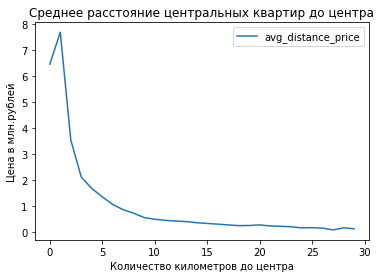

In [78]:
spb_data['avg_distance_price'] = spb_data.apply(avg_price_km, axis =1)

spb_data.pivot_table(index = 'downtown_km', values = 'avg_distance_price')

(spb_data
     .pivot_table(index = 'downtown_km', values = 'avg_distance_price')
     .plot()
)
plt.title("Среднее расстояние центральных квартир до центра")
plt.xlabel("Количество километров до центра")
plt.ylabel("Цена в млн.рублей")
plt.show()

1. Для начала я создаю столбец downtown_km, куда я складирую все значения расстояния от квартиры до центра. Потом
округляю эти значение до целых чисел. 
2. Затем пишу функцию, которая построчно делит цену квартиры на расстояние до километров. Все результаты деления 
кладу в spb_data['avg_distance_price']. 
3. Из-за того, что в некоторых значениях расстояния округлялись до нулей пришлось применить try/except, потому
что иначе выдавало ошибку деления на ноль.
4. Потом применил функцию ко всему датафрейму и получил результат стоимости квадратного метра в зависимости от
расстояния.
5. Чтобы определить, где заканчивается центр, сделал сводную таблицу где определил нужный порог. После 5км есть
большая разница в значениях, которая указывает на завершение центральной зоны.

5	1,700,401

6	1,319,667


6. Эту разницу можно заметить и на графике, который стабилизируется ближе к 6-8 км и идет с большего вдоль оси. 

7. Таким образом, граница центральной зоны проходит на 5ом километре от центра города. 

In [79]:
center_flats = spb_data.query('downtown_km < 6')

In [80]:
center_flats.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,ponds_nearest,days_exposition,square_metre,weekday_ad_exposition,month_ad_exposition,year_ad_exposition,living_to_total_size,kitchen_to_total_size,downtown_km,avg_distance_price
count,575,575,575,575,575,575,575,575,575,575,...,413,575,575,575,575,575,575,575,575,575
mean,9,7,61,2,3,7,35,4,10,0,...,487,144,"115,431",3,7,"2,017",1,0,4,2
std,6,2,18,1,0,4,13,3,4,1,...,275,135,"29,336",2,3,1,0,0,1,2
min,0,2,30,0,2,2,10,1,5,0,...,22,3,"26,250",0,1,"2,015",0,0,0,0
25%,5,5,46,2,3,5,25,2,8,0,...,250,41,"94,772",1,4,"2,017",0,0,3,1
50%,8,7,60,2,3,5,33,3,10,0,...,454,91,"110,048",3,7,"2,017",1,0,4,2
75%,13,8,75,3,3,7,44,5,12,0,...,705,215,"130,029",4,10,"2,018",1,0,5,2
max,32,10,103,4,3,25,75,19,29,5,...,"1,156",521,"262,712",6,12,"2,019",1,1,5,10


In [81]:
print('\033[1m' + 'Общая площадь центральных квартирах' + '\033[0m')
print(center_flats['total_area'].describe())
print()
print()
print('\033[1m' + 'Общая площадь квартир по всему городу' + '\033[0m')
print(data['total_area'].describe())

Общая площадь центральных квартирах
count   575
mean     61
std      18
min      30
25%      46
50%      60
75%      75
max     103
Name: total_area, dtype: float64


Общая площадь квартир по всему городу
count   15,135
mean        51
std         15
min         29
25%         39
50%         47
75%         60
max        104
Name: total_area, dtype: float64


Квартиры в центре города в среднем на 15 кв.м больше, чем квартиры по всей базе. 
- Мы можем предположить, что более старые здания, которые были построены в оснвоном в прошлом предназначались для более
состоятельных или статусных хозяев, поэтому площадь у них больше. При массовом строительстве квартир, которое имело место позже по времени и которые находились дальше от центра, размеры квартир были в основном поменьше. 

In [82]:
pd.options.display.float_format = '{:,.2f}'.format
print('\033[1m' + 'Цена центральных квартирах' + '\033[0m')
print(center_flats['last_price'].describe())
print()
print()
print('\033[1m' + 'Цена квартир по всему городу' + '\033[0m')
print(data['last_price'].describe())


Цена центральных квартирах
count   575.00
mean      6.78
std       1.65
min       2.10
25%       5.45
50%       6.80
75%       8.00
max      10.00
Name: last_price, dtype: float64


Цена квартир по всему городу
count   15,135.00
mean         4.51
std          1.76
min          1.01
25%          3.30
50%          4.20
75%          5.50
max         10.00
Name: last_price, dtype: float64


Цены на квартиры в центре в среднем составляют 6,91 млн., а в целом по городу 4,63 млн. В центре квартиры в среднем на 32% дороже, чем по всему городу.
- Соответственно мы можем подтвердить предположение, что фактор местоположения играет важную роль в 
ценообразовании квартир. Чем ближе к центру, тем в среднем дороже. Прямая, положительная связь.

In [83]:
print('\033[1m' + 'Количество комнат в центральных квартирах' + '\033[0m')
print(center_flats['rooms'].describe())
print()
print()
print('\033[1m' + 'Количество комнат в квартирах по всему городу' + '\033[0m')
print(data['rooms'].describe())

Количество комнат в центральных квартирах
count   575.00
mean      2.19
std       0.88
min       0.00
25%       2.00
50%       2.00
75%       3.00
max       4.00
Name: rooms, dtype: float64


Количество комнат в квартирах по всему городу
count   15,135.00
mean         1.86
std          0.84
min          0.00
25%          1.00
50%          2.00
75%          2.00
max          6.00
Name: rooms, dtype: float64


По количеству комнат в среднем квартиры в центре и в целом по городу отличаются очень мало. В среднем две 
комнаты и стандартное отклонение 1. 

In [84]:
print('\033[1m' + 'Высота потолков в центральных квартирах' + '\033[0m')
print(center_flats['ceiling_height'].describe())
print()
print()
print('\033[1m' + 'Высота потолков в квартирах по всему городу' + '\033[0m')
display(data['ceiling_height'].describe())

Высота потолков в центральных квартирах
count   575.00
mean      2.68
std       0.09
min       2.40
25%       2.65
50%       2.65
75%       2.70
max       2.95
Name: ceiling_height, dtype: float64


Высота потолков в квартирах по всему городу


count   15,135.00
mean         2.63
std          0.09
min          2.00
25%          2.58
50%          2.65
75%          2.65
max          2.97
Name: ceiling_height, dtype: float64

В центральных квартирах потолки в среднем чуть выше, чем в остальных квартирах: 2.68 vs 2.63. 
Скорее всего это связано с тем, что в центральной части города больше более старых зданий, где потолки выше, чем те, что
в стандартных планировках.

### 5.Факторы стоимости центральных квартир

In [85]:

print("Корреляция между стоимостью кв.м и общей площадью в центре:",center_flats['square_metre'].corr(center_flats['total_area']))
print()
print("Корреляция между стоимостью кв.м и общей площадью в во всем городе:",data['square_metre'].corr(data['total_area']))





Корреляция между стоимостью кв.м и общей площадью в центре: -0.5525751812802084

Корреляция между стоимостью кв.м и общей площадью в во всем городе: -0.15714493485936332


-В центральных квартирах присутствует ощутимая, негативная корреляция(-0.55) между  переменными стоимость квадратного метра и общей площадью. В квартирах по всему городу также присутствует негативная связь между этими переменными, но меньшей интенсивности (-0.15).
При увеличении площади, стоимость немного падает, либо наоборот при меньшем метраже стоимость часто 
растет. Связано это с тем, что в бизнесе жилой недвижимости, часто увеличение площади квартиры предполагает удешевление
стоимости квадратного метра, хотя общая стоимость квартиры все равно растет прилично.

In [86]:
print("Корреляция между стоимостью кв.м и количеством комнат в центре:",center_flats['square_metre'].corr(center_flats['rooms']))
print()
print("Корреляция между стоимостью кв.м и количестовм комнат во всем городе:",data['square_metre'].corr(data['rooms']))


Корреляция между стоимостью кв.м и количеством комнат в центре: -0.5496559910635737

Корреляция между стоимостью кв.м и количестовм комнат во всем городе: -0.28747855880376183


-В центре между количеством комнат и ценой на квадратный метр присутствует ощутимая негативная связь(-0.54). Эта корреляция указывает на то, что при увеличении количества комнат, цена квадратный метр падает. Подобно логике в предыдущем разделе, при увеличении количества комнат (площадь тоже как правило растет), стоимость квадратного метра как правило уменьшается.

-В квартирах по всему городу присутствует аналогичная тенденция(-0.28), просто сила связи между переменными чуть слабее.
Это опять-таки можно объяснить большей гетерогенностью (разношёрстностью) квартир по всему городу по сравнению с 
центром.

In [87]:

print("Корреляция между стоимостью кв.м и близостью к центру в центральных квартирах:",center_flats['square_metre'].corr(center_flats['cityCenters_nearest']))
print()
print("Корреляция между стоимостью кв.м и близостью к центру во всем городе :", data['square_metre'].corr(data['cityCenters_nearest']))




Корреляция между стоимостью кв.м и близостью к центру в центральных квартирах: 0.13250884548392028

Корреляция между стоимостью кв.м и близостью к центру во всем городе : -0.39505580991789413


-Между местоположением центральных квартир и ценой на квадратный метра присутствует небольшая положительная связь(0.13). Это
говорит о том, что вероятно, квартиры, что находятся немного поодаль от той точки, которую мы задали как самую центральную
являются более дорогими, потому что те районы которые находятся на пару километров от самой центральной точки являются более престижными.
-В то же время, во всем городе в целом, присутствует приличная негативная связь(-0.386) между близостью к центру и ценами на 
квадратный метра квартир. Близость к рабочему месту, более комфортные условия проживания и наличие развитой инфраструктуры в более центральных частях города продалжают влиять на стоимость квартир. Следовательно, это важный фактор при ценообразовании.

In [88]:
print("Корреляция между стоимостью кв.м и днем размещения квартив в центре:",center_flats['square_metre'].corr(center_flats['weekday_ad_exposition']))    
print()
print("Корреляция между стоимостью кв.м и днем размещения квартир во всем городе:",data['square_metre'].corr(data['weekday_ad_exposition']))    



Корреляция между стоимостью кв.м и днем размещения квартив в центре: 0.0038048672983406005

Корреляция между стоимостью кв.м и днем размещения квартир во всем городе: 0.0014835328307458504


Корреляция между днём недели, когда появилось объявление как для центральных квартир, так и для всего города в целом,
практически отсутствует. Соответственно, то, в какой день недели размещалось объявление не является важным фактором,
который влияет на стоимость квартиры.

In [89]:
print("Корреляция между стоимостью кв.м и месяцем размещения квартив в центре:", center_flats['square_metre'].corr(center_flats['month_ad_exposition']))    
print()
print("Корреляция между стоимостью кв.м и месяцем размещения квартив во всем городе:",data['square_metre'].corr(data['month_ad_exposition']))    



Корреляция между стоимостью кв.м и месяцем размещения квартив в центре: -0.03599084964383216

Корреляция между стоимостью кв.м и месяцем размещения квартив во всем городе: 0.0047378225288540665


Аналогично дням недели, месяц размещения никак не влияет на стоимость квартиры в обоих датасетах

In [90]:
print("Корреляция между стоимостью кв.м и годом размещения квартив в центре:",center_flats['square_metre'].corr(center_flats['year_ad_exposition']))   
print()
print("Корреляция между стоимостью кв.м и годом размещения квартив во всем городе:",data['square_metre'].corr(data['year_ad_exposition']))   



Корреляция между стоимостью кв.м и годом размещения квартив в центре: 0.152219059161258

Корреляция между стоимостью кв.м и годом размещения квартив во всем городе: 0.08694682611319839


Присутствует небольшая положительная связь(0.13 в центре и 0.08 по всему городу) между годом и стоимостью квадратного
метра. Это можно объяснить тем фактом, что в нашем датафрейме присутствуют данные с 2015 по 2019 годы.
Положительная корреляция говорит о том, что при увеличении годов, увеличивалась и стоимость кв.м.
В 2015-2015 годах экономика находилась в кризисе и соответственно продолжала пикировать. Покупательная
способность падала, и поэтому рынок подстраивался снижением цен. В то, время как после того, как экономика 
оттолкнулась от дна в 2017-2019 годах и наблюдался определенный рост, то и цены на жилье стали потихоньку подтягиваться.

In [91]:
print ('\033[1m' + 'Стоимость квартир и фактор этажа квартиры в центральных квартирах' + '\033[0m')
display(center_flats.pivot_table(index = 'floor_category', values = 'square_metre'))
print()
print ('\033[1m' + 'Стоимость квартир и фактор этажа квартиры по всему городу' + '\033[0m')
display(data.pivot_table(index = 'floor_category', values = 'square_metre'))

Стоимость квартир и фактор этажа квартиры в центральных квартирах


,square_metre
floor_category,
другой,"120,321.45"
первый,"102,553.15"
последний,"110,054.56"



Стоимость квартир и фактор этажа квартиры по всему городу


,square_metre
floor_category,
другой,"93,676.56"
первый,"77,425.99"
последний,"81,862.86"


В обоих датасетах я наблюдаю идентичную динамику.Первый этаж самый дешевый, на 19 % дешевле квартир с непоследним этажем по всему городу и на 16 % в центальных квартирах. Люди меньше всего хотят жить на первом этаже, поэтому там самые дешевые квартиры в доме. Аналогично с последним этажом, там квартиры на 10 % и 12 % дешевле от квартир на непоследних(и не первых) этажах
в центральном районе и по всему городу. 

### Шаг 5. Общий вывод

1. При анализе цен на кв.м в квартирах в разных населенных пунктах выяснили, что в самом Петербурге(107612.14) цены находятся на третьем месте после цен в поселке Лисий Нос	(168706.70) и Зеленогорске	(114233.78).

2. В то же время Петербург идет с большим отрывом по количеству объявлений, что неудивительно.

3. При анализе факторов, которые влияют на стоимость квартиры для всех квартир по городу наиболее важным фактором являются:
а) Общее количество квадратных метров (-.055 и -0.15 соответственно для центральных квартир и по всему городу)
б) Этаж квартиры (-0.54 и -0.28 соответственно для центральных квартир и по всему городу)
в) Местоположение (0.13 и -0.40 соответственно для центральных квартир и по всему городу). 
г) Соответственно первый этаж самый дешевый, в то время как непервый/непоследний самый дорогой. 

4. Расстояние 6км от центра выделяет цетральную зону города, стоимость кв.м которой значительно отличается от квартир по всему городу. 

5. Если сравнивать сами характеристики центральных квартир с квартирами по всему городу, то они имеют большую среднюю цену(6,81 млн vs 4,61 млн), больший метраж(61 кв.м vs 51 кв.м.) и имеют более высокие потолки(2.68 vs 2.61).

6. При сравнении центральных квартир и квартир, находящихся по всему городу, я определил, что:

а) Для центральных квартир, в отличии от остальных по городу, увеличении площади более выраженно влияет на стоимость квадратного метра(-0.55). Т.е при увеличении площади, стоимость квадратного метра падает, и наоборот. В целом по городу эта тенденция менее выражена(-0.15).

б) Стоимость квадратного метра в центральных квартирах была более чувствительна к количеству комнат по сравнению с остальными квартирами (-0.54 и -0.28 соответственно). При увеличении количества комнат, цена падала; при уменьшении цены росло количество комнат.

в) Этаж квартиры является важным фактором, который влияет на стоимость кв.м. В обоих случаях аплитуда изменения цен примерна одинакова.

г) Год размещения имеет определенный эффиектна изменение стоимости кв.м.в центраьлных(0.13) и нецентральных квартирах(0.08). Слабая положительная связь говорит о том, что в более поздних годах цены были выше, чем в предыдущих.

д) Центральное местоположение играет важнейшую роль в цене на кв.м в квартирах по городу в целом(коэффициент корреляции - 0.39), в то время как центральных неболшая положительная связь(0.13) говорит о том, что немного подальше от самой центральной точки цены на кв.м становятся немного выше.
Таким образом, хотя сила влияния факторов отличается, динамика влияния факторов в центральных и нецентральных квартирах достаточно похожа.
